In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import math
from sklearn import preprocessing
# import zipfile
# with zipfile.ZipFile('./archive.zip', 'r') as zip_ref:
#     zip_ref.extractall('./data')

In [34]:
# 군집 1: 주, 가격(사용자의 예산범위로 간주), 오전/오후, 이벤트 타입, 메인, 서브으로 --> 10개로 군비 카테고리 군집
# 군집 2: 브렌드, 군집, 브랜드 평점으로, --> 상품 예측(군집)

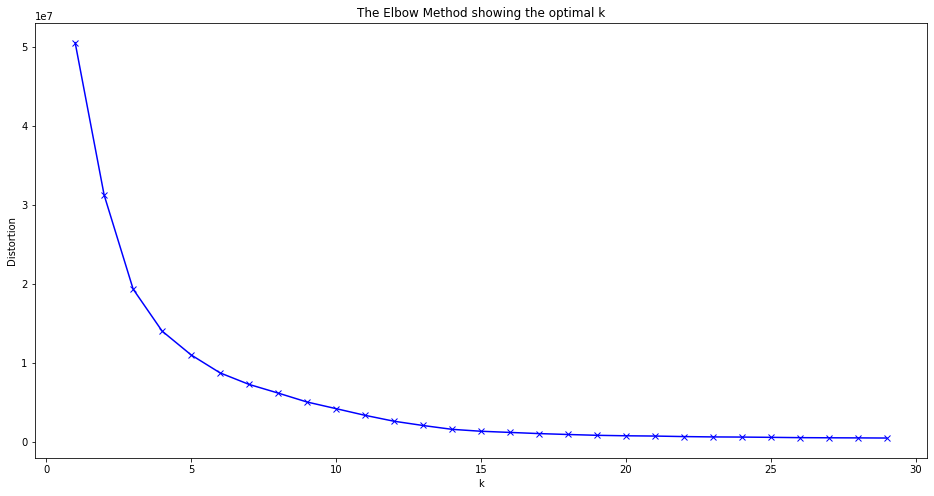

In [35]:
### 최적의 클러스터 갯수 구하기 
from sklearn.manifold import TSNE
Remove_null_Nov_copy = Nov_copy.dropna(how='any',axis=0)
pca = TSNE(2)
X = Remove_null_Nov_copy[['weekday','day/night','event_type_cat']]
X = preprocessing.scale(X)
X = pca.fit_transform(X)
distortions = []
length = 30
for k in range(1,length):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    distortions.append(kmeans.inertia_)
K = range(1,length)
plt.figure(figsize=(16,8))
plt.plot(K[:length], distortions[:length], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

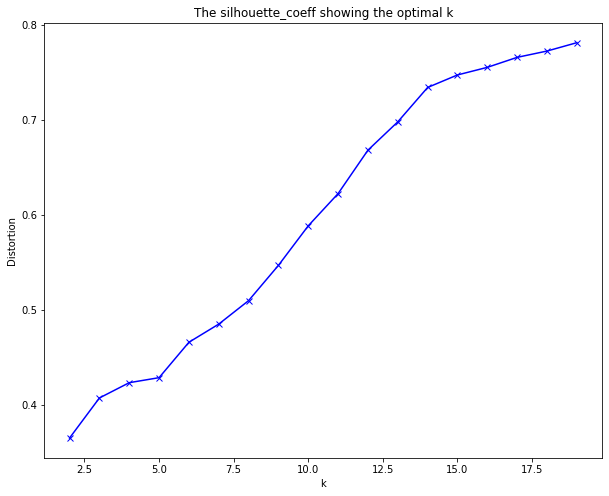

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
distortions = []
length = 20
for k in range(2,length):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    y_kmeans = kmeans.predict(X)
    A = silhouette_score(X, y_kmeans)
    distortions.append(A)
K = range(2,length)
plt.figure(figsize=(10,8))
plt.plot(K[:length], distortions[:length], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The silhouette_coeff showing the optimal k')
plt.show()

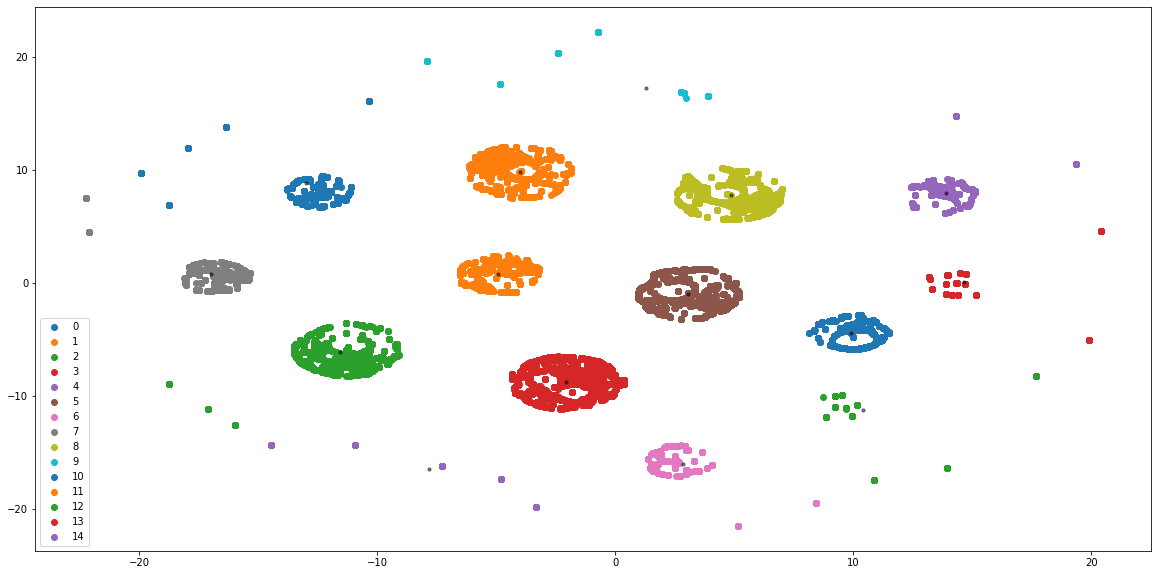

In [85]:
## K-means 1 결과 시각화
from sklearn.manifold import TSNE
# 찾고자하는 굽집에 3-4배 이상의 군집으로 찾기
Remove_null_Nov_copy = Nov_copy.dropna(how='any',axis=0)
pca = TSNE(2)
X = Remove_null_Nov_copy[['weekday','day/night','event_type_cat']]
X = preprocessing.scale(X)
k = 15

X = pca.fit_transform(X)
brand_type = Nov_copy.brand.unique()

kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
u_labels = np.unique(y_kmeans)
Remove_null_Nov_copy['FirstCluster'] = y_kmeans
centers = kmeans.cluster_centers_

plt.figure(figsize=(20, 10))
for i in u_labels:
    plt.scatter(X[y_kmeans == i , 0] , X[y_kmeans == i , 1] , label = i)
plt.legend()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=10, alpha=0.5, edgecolor='black');
plt.show()

In [38]:
# DBSCAN으로 circle, moon, diagonal shaped data를 군집화한 결과
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.manifold import TSNE
pca = TSNE(2)
# 원형 분포 데이터 plot
X = Remove_null_Nov_copy[['weekday','day/night','event_type_cat']]
X = preprocessing.scale(X)
X = pca.fit_transform(X)
epsilon, minPts = 0.8, 30 # 2)와 3) 과정에서 사용할 epsilon, minPts 값을 설정
db = DBSCAN(eps=epsilon, min_samples=minPts) # 위에서 생성한 원형 분포 데이터에 DBSCAN setting
db.fit(X) # 3) ~ 5) 과정을 반복

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


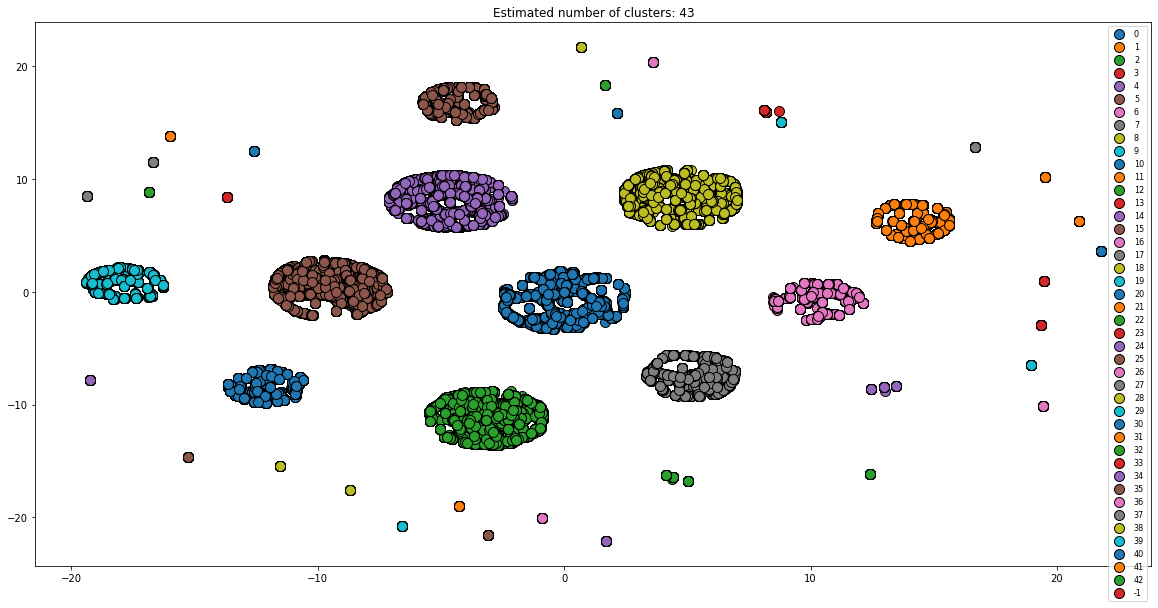

In [39]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
# print(unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(20, 10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0] , xy[:,1] , label = k, s=100, edgecolor ='black')

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.legend(loc='best',fontsize=8)
plt.show()

In [86]:
### 실루엣 분석 --> 각 군집 간의 거리가 얼마나 효율적으로 분리 돼있는지 나타내는 지표 (내부 지표)
# 1로 가까워 질수록 근처의 군집과 더 멀리 떨어져있음.
# 0에 가까울 수록 더 가까워짐
# -의 경우 아예 다른 군집에 데이터 포인트가 할당됐음
from sklearn.metrics import silhouette_samples, silhouette_score
Remove_null_Nov_copy['silhouette_coeff'] = silhouette_samples(X, y_kmeans)

# print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(X, y_kmeans)
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터셋 Silhouette Analysis Score:0.748


In [87]:
Remove_null_Nov_copy.head()

,Unnamed: 0,product_id,brand,price,brand_count,category_code_count,Brand Position,Main_category,Sub_category,weekday,day/night,event_type_cat,FirstCluster,silhouette_coeff
0,0,6200897,306,125.47,350030,285987,-1,2,2,5,0,0,3,0.857143
1,1,4804056,16,162.60,6259379,1816877,2,6,33,2,0,1,13,0.015349
2,2,1307188,148,211.05,515352,2180554,-1,4,55,4,0,0,5,0.750225
3,3,1004838,227,154.39,811698,16375000,-1,6,76,5,0,1,10,0.106614
4,4,1005116,16,979.43,6259379,16375000,2,6,76,5,1,0,8,0.865410


In [88]:
Remove_null_Nov_copy.shape, len(Remove_null_Nov_copy.product_id.unique()) ## 전체 데이터 크기, product 종류

((296578, 14), 22188)

In [89]:
## Product id 전처리 --> 뒤의 4자리 삭제
print((Remove_null_Nov_copy[Remove_null_Nov_copy['Main_category'] == 6]).head(5)) # XXX(제품명) + YYYY(품번)
Remove_null_Nov_copy['preprocessed_product_id'] = -1
for i in range(Remove_null_Nov_copy.shape[0]):
    Remove_null_Nov_copy['preprocessed_product_id'][i] = int(Remove_null_Nov_copy['product_id'][i]%10000)

   Unnamed: 0  product_id  brand   price  brand_count  category_code_count  \
1           1     4804056     16  162.60      6259379              1816877   
3           3     1004838    227  154.39       811698             16375000   
4           4     1005116     16  979.43      6259379             16375000   
5           5     5100575     16  457.87      6259379              2086966   
6           6     1005104     16  990.40      6259379             16375000   

   Brand Position  Main_category  Sub_category  weekday  day/night  \
1               2              6            33        2          0   
3              -1              6            76        5          0   
4               2              6            76        5          1   
5               2              6            14        2          0   
6               2              6            76        3          0   

   event_type_cat  FirstCluster  silhouette_coeff  
1               1            13          0.015349  
3     

<ipython-input-89-6f47cc80cc7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Remove_null_Nov_copy['preprocessed_product_id'][i] = int(Remove_null_Nov_copy['product_id'][i]%10000)


In [90]:
Remove_null_Nov_copy[Remove_null_Nov_copy['FirstCluster']==11]

,Unnamed: 0,product_id,brand,price,brand_count,category_code_count,Brand Position,Main_category,Sub_category,weekday,day/night,event_type_cat,FirstCluster,silhouette_coeff,preprocessed_product_id
7,7,3701056,275,69.45,7889245,1528058,-1,2,94,6,1,0,11,0.876706,1056
21,21,1801805,22,241.94,664281,2208046,-1,6,92,6,1,0,11,0.876706,1805
26,26,1005217,343,145.43,4638062,16375000,-1,6,76,6,1,0,11,0.876706,5217
28,28,1002525,16,720.20,6259379,16375000,2,6,76,6,1,0,11,0.877388,2525
29,29,6000258,294,441.20,208087,298615,-1,3,3,6,1,0,11,0.787454,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296539,296539,30000003,151,139.49,115385,148510,-1,5,101,6,1,0,11,0.877462,3
296540,296540,1004739,343,203.17,4638062,16375000,-1,6,76,6,1,0,11,0.865180,4739
296545,296545,39700194,78,141.57,18564,245291,-1,1,19,6,1,0,11,0.819722,194
296563,296563,28300405,239,52.25,25790,70394,-1,0,98,6,1,0,11,0.880777,405


In [91]:
print(len(Remove_null_Nov_copy.preprocessed_product_id.unique()))
Remove_null_Nov_copy.head()

6943


,Unnamed: 0,product_id,brand,price,brand_count,category_code_count,Brand Position,Main_category,Sub_category,weekday,day/night,event_type_cat,FirstCluster,silhouette_coeff,preprocessed_product_id
0,0,6200897,306,125.47,350030,285987,-1,2,2,5,0,0,3,0.857143,897
1,1,4804056,16,162.60,6259379,1816877,2,6,33,2,0,1,13,0.015349,4056
2,2,1307188,148,211.05,515352,2180554,-1,4,55,4,0,0,5,0.750225,7188
3,3,1004838,227,154.39,811698,16375000,-1,6,76,5,0,1,10,0.106614,4838
4,4,1005116,16,979.43,6259379,16375000,2,6,76,5,1,0,8,0.865410,5116


In [92]:
from sklearn.preprocessing import LabelEncoder
code = np.array((Remove_null_Nov_copy['preprocessed_product_id']))
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(code)
Remove_null_Nov_copy['preprocessed_product_id'] = vec
Remove_null_Nov_copy['preprocessed_product_id']

0          897
1         3383
2         5459
3         4015
4         4226
          ... 
296573    4322
296574      23
296575    6524
296576    3871
296577    1059
Name: preprocessed_product_id, Length: 296578, dtype: int64

In [61]:
len(X)

296578

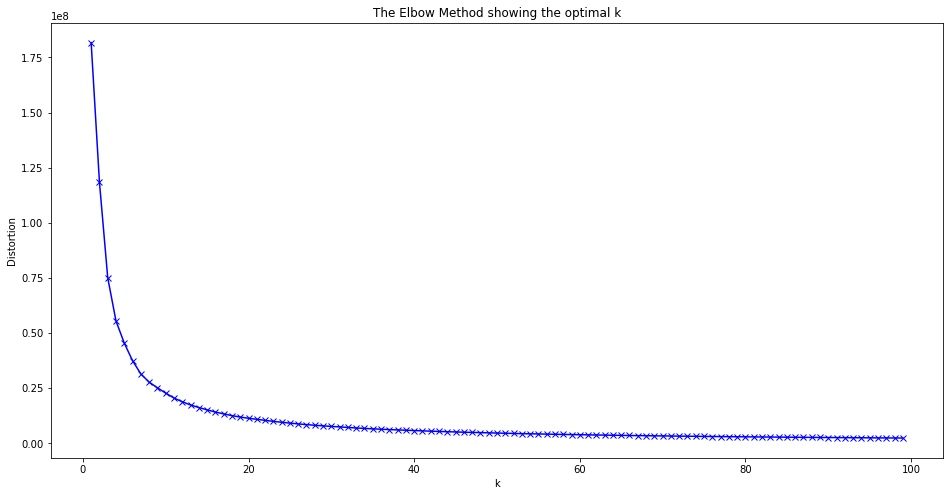

In [79]:
pca = TSNE(2)
X = Remove_null_Nov_copy[['FirstCluster', 'price', 'Main_category', 'Sub_category', 'Brand Position', 'brand','brand_count','category_code_count']]
labels = Remove_null_Nov_copy['preprocessed_product_id']
X = preprocessing.scale(X)
X = pca.fit_transform(X)
distortions = []
length = 100
for k in range(1,length):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    distortions.append(kmeans.inertia_)
K = range(1,length)
plt.figure(figsize=(16,8))
plt.plot(K[:length], distortions[:length], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

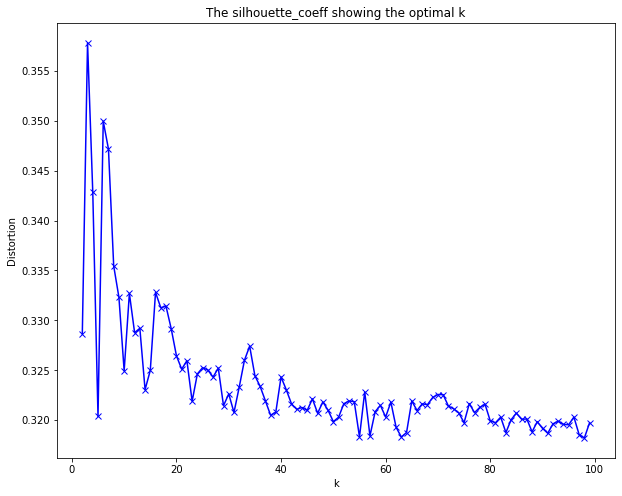

In [82]:
from sklearn.metrics import silhouette_samples, silhouette_score
distortions = []
length = 100
for k in range(2,length):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    y_kmeans = kmeans.predict(X)
    A = silhouette_score(X, y_kmeans)
    distortions.append(A)
K = range(2,length)
plt.figure(figsize=(10,8))
plt.plot(K[:length], distortions[:length], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The silhouette_coeff showing the optimal k')
plt.show()

In [84]:
Remove_null_Nov_copy

,Unnamed: 0,product_id,brand,price,brand_count,category_code_count,Brand Position,Main_category,Sub_category,weekday,day/night,event_type_cat
0,0,6200897,306,125.47,350030,285987,-1,2,2,5,0,0
1,1,4804056,16,162.60,6259379,1816877,2,6,33,2,0,1
2,2,1307188,148,211.05,515352,2180554,-1,4,55,4,0,0
3,3,1004838,227,154.39,811698,16375000,-1,6,76,5,0,1
4,4,1005116,16,979.43,6259379,16375000,2,6,76,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
296573,296573,1005217,343,143.83,4638062,16375000,-1,6,76,4,0,0
296574,296574,9700023,3,25.83,38946,35514,-1,4,63,1,0,0
296575,296575,28718989,35,86.23,276407,1886890,-1,1,74,1,1,0
296576,296576,1004665,275,842.98,7889245,16375000,-1,6,76,0,0,0


In [69]:
len(Remove_null_Nov_copy.preprocessed_product_id.unique())

6943

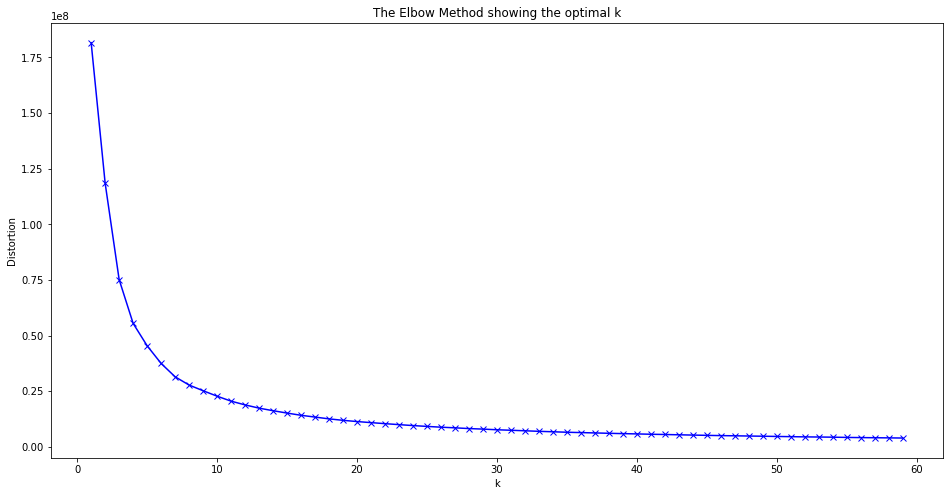

In [93]:
### 최적의 클러스터 갯수 구하기 
from sklearn.manifold import TSNE
#Remove_null_Nov_copy = Nov_copy.dropna(how='any',axis=0)
pca = TSNE(2)
X = Remove_null_Nov_copy[['FirstCluster', 'price', 'Main_category', 'Sub_category', 'Brand Position', 'brand','brand_count','category_code_count']]
X = preprocessing.scale(X)
X = pca.fit_transform(X)
distortions = []
length = 60
for k in range(1,length):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    distortions.append(kmeans.inertia_)
K = range(1,length)
plt.figure(figsize=(16,8))
plt.plot(K[:length], distortions[:length], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [1]:
X = Remove_null_Nov_copy[['FirstCluster', 'price', 'Main_category', 'Sub_category', 'Brand Position', 'brand','brand_count','category_code_count']]
pca = TSNE(2)
X = preprocessing.scale(X)
X = pca.fit_transform(X)
#k = len(Remove_null_Nov_copy.preprocessed_product_id.unique())
k = 60

kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
u_labels = np.unique(y_kmeans)
Remove_null_Nov_copy['SecondCluster'] = y_kmeans
centers = kmeans.cluster_centers_

plt.figure(figsize=(20, 10))
for i in u_labels:
    plt.scatter(X[y_kmeans == i , 0] , X[y_kmeans == i , 1] , label = i, edgecolor='black')
plt.legend()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=10, alpha=0.5);
plt.show()

NameError: name 'Remove_null_Nov_copy' is not defined

In [95]:
from sklearn.metrics import silhouette_samples, silhouette_score
Remove_null_Nov_copy['silhouette_coeff'] = silhouette_samples(X, y_kmeans)
# print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(X, y_kmeans)
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터셋 Silhouette Analysis Score:0.321


### 최종 클러스터 분석

In [16]:
del Remove_null_Nov_copy['Unnamed: 0']

In [20]:
Remove_null_Nov_copy.groupby('SecondCluster').mean()

,product_id,brand,price,brand_count,category_code_count,Brand Position,Main_category,Sub_category,weekday,day/night,event_type_cat,FirstCluster,preprocessed_product_id
SecondCluster,,,,,,,,,,,,,
0,1.161467e+07,197.240346,253.158430,7.600903e+05,2.264103e+06,-0.964209,5.111825,54.741074,3.190770,0.0,0.061050,2.531381,1557.246254
1,6.429304e+06,175.963340,202.661774,1.342152e+06,2.253493e+06,-0.362966,3.647201,51.721735,3.238433,0.0,0.078078,3.389086,1543.685728
2,6.457167e+06,172.962185,347.011895,2.515258e+06,6.781755e+06,-0.337174,4.454799,68.908390,3.398866,0.0,0.078417,2.954009,2458.023506
3,1.004137e+07,127.142751,374.217773,1.637043e+06,3.523354e+06,3.026194,3.534679,53.801318,3.494893,0.0,0.067216,2.940692,2117.334514
4,6.897081e+06,167.272504,286.957028,2.566468e+06,6.545227e+06,-0.408755,4.826943,62.377794,3.626512,0.0,0.075046,2.516916,2703.141583
5,5.393760e+06,182.290712,394.304609,5.704278e+06,1.064035e+07,1.165140,5.170356,68.675827,3.800000,0.0,0.099873,2.527481,3048.171501
6,5.970368e+06,163.757707,401.050502,4.426130e+06,1.086406e+07,2.984003,5.456329,67.331504,3.749299,0.0,0.092363,2.626576,3318.320995
7,3.661742e+06,189.979470,403.157607,5.577355e+06,1.266860e+07,1.890831,5.544042,71.158552,3.025108,0.0,0.156887,2.788598,3506.491053
8,5.555460e+06,175.130819,346.393403,4.579459e+06,1.113401e+07,4.002180,5.170391,70.332389,3.777826,0.0,0.087976,2.447945,3170.992805


In [21]:
Remove_null_Nov_copy.groupby(['SecondCluster','weekday']).count()

product_id  brand  price  brand_count  \
SecondCluster weekday                                          
0             0              2473   2473   2473         2473   
              1               646    646    646          646   
              2              1426   1426   1426         1426   
              3               997    997    997          997   
              4              1976   1976   1976         1976   
...                           ...    ...    ...          ...   
29            2              1104   1104   1104         1104   
              3              1066   1066   1066         1066   
              4              1843   1843   1843         1843   
              5              3435   3435   3435         3435   
              6              2180   2180   2180         2180   

                       category_code_count  Brand Position  Main_category  \
SecondCluster weekday                                                       
0             0                       2473            2473           2473   
              1                        646             646            646   
              2                       1426            1426           1426   
              3                        997             997            997   
              4                       1976            1976           1976   
...                                    ...             ...            ...   
29            2                       1104            1104           1104   
              3                       1066            1066           1066   
              4                       1843            1843           1843   
              5                       3435            3435           3435   
              6                       2180            2180           2180   

                       Sub_category  day/night  event_type_cat  FirstCluster  \
SecondCluster weekday                                                          
0             0                2473       2473            2473          2473   
              1                 646        646             646           646   
              2                1426       1426            1426          1426   
              3                 997        997             997           997   
              4                1976       1976            1976          1976   
...                             ...        ...             ...           ...   
29            2                1104       1104            1104          1104   
              3                1066       1066            1066          1066   
              4                1843       1843            1843          1843   
              5                3435       3435            3435          3435   
              6                2180       2180            2180          2180   

                       preprocessed_product_id  
SecondCluster weekday                           
0             0                           2473  
              1                            646  
              2                           1426  
              3                            997  
              4                           1976  
...                                        ...  
29            2                           1104  
              3                           1066  
              4                           1843  
              5                           3435  
              6                           2180  

[210 rows x 12 columns]

In [96]:
# 1번 상품에 대해 잘 예측하는가????? 100 3111(제품)
Remove_null_Nov_copy[Remove_null_Nov_copy['SecondCluster'] == 1]

,Unnamed: 0,product_id,brand,price,brand_count,category_code_count,Brand Position,Main_category,Sub_category,weekday,day/night,event_type_cat,FirstCluster,silhouette_coeff,preprocessed_product_id,SecondCluster
110,110,1005062,343,164.97,4638062,16375000,-1,6,76,5,0,0,3,0.276892,4177,1
113,113,28718722,266,89.84,765331,1886890,-1,1,74,4,0,0,5,0.037638,6370,1
116,116,1004856,275,126.90,7889245,16375000,-1,6,76,0,0,0,4,0.326932,4029,1
230,230,1003712,275,512.24,7889245,16375000,-1,6,76,1,1,0,9,0.247519,3162,1
231,231,1004833,275,170.09,7889245,16375000,-1,6,76,5,0,0,3,0.048971,4010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296037,296037,1005115,16,915.08,6259379,16375000,2,6,76,4,0,0,5,0.392119,4225,1
296287,296287,1004856,275,126.12,7889245,16375000,-1,6,76,0,0,0,4,0.209827,4029,1
296341,296341,1004833,275,169.67,7889245,16375000,-1,6,76,5,0,0,3,0.540922,4010,1
296354,296354,4803977,275,120.47,7889245,1816877,-1,6,33,6,0,0,2,0.328221,3338,1


In [106]:
Remove_null_Nov_copy[Remove_null_Nov_copy['SecondCluster'] == 2].sort_values(by = ['silhouette_coeff'],ascending=False)

,Unnamed: 0,product_id,brand,price,brand_count,category_code_count,Brand Position,Main_category,Sub_category,weekday,day/night,event_type_cat,FirstCluster,silhouette_coeff,preprocessed_product_id,SecondCluster
154015,154015,1802147,105,133.59,24477,2208046,-1,6,92,4,0,0,5,0.634750,2132,2
120715,120715,1802147,105,133.59,24477,2208046,-1,6,92,4,0,0,5,0.634750,2132,2
287473,287473,1801988,103,154.42,252822,2208046,-1,6,92,4,0,0,5,0.634720,1977,2
211608,211608,1802147,105,154.19,24477,2208046,-1,6,92,4,0,0,5,0.634519,2132,2
172321,172321,1802137,105,164.71,24477,2208046,-1,6,92,4,0,0,5,0.634395,2124,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134361,134361,1480393,186,926.64,727390,690502,-1,4,21,6,1,0,11,-0.025175,393,2
220917,220917,1480393,186,926.64,727390,690502,-1,4,21,6,1,0,11,-0.025175,393,2
185766,185766,1480393,186,926.64,727390,690502,-1,4,21,6,1,0,11,-0.025175,393,2
292979,292979,1480393,186,926.64,727390,690502,-1,4,21,6,1,0,11,-0.025175,393,2


In [107]:
Remove_null_Nov_copy[Remove_null_Nov_copy['SecondCluster'] == 3].sort_values(by = ['silhouette_coeff'],ascending=False)

,Unnamed: 0,product_id,brand,price,brand_count,category_code_count,Brand Position,Main_category,Sub_category,weekday,day/night,event_type_cat,FirstCluster,silhouette_coeff,preprocessed_product_id,SecondCluster
219063,219063,3701095,275,73.36,7889245,1528058,-1,2,94,0,1,0,12,0.614885,1095,3
142057,142057,3700278,275,69.47,7889245,1528058,-1,2,94,0,1,0,12,0.614503,278,3
61994,61994,3700926,275,69.47,7889245,1528058,-1,2,94,0,1,0,12,0.614503,926,3
180204,180204,3700926,275,69.47,7889245,1528058,-1,2,94,0,1,0,12,0.614503,926,3
159992,159992,3700926,275,69.47,7889245,1528058,-1,2,94,2,0,2,12,0.614503,926,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125618,125618,28719390,267,99.36,170727,1886890,-1,1,74,5,0,0,3,-0.029151,6720,3
164044,164044,28719389,267,99.36,170727,1886890,-1,1,74,5,0,0,3,-0.029169,6719,3
169220,169220,21404354,62,45.56,374343,2086966,-1,6,14,5,1,0,8,-0.032008,3616,3
266974,266974,21404354,62,45.56,374343,2086966,-1,6,14,5,1,0,8,-0.032745,3616,3


In [23]:
Remove_null_Nov_copy[Remove_null_Nov_copy['SecondCluster'] == 4]

,Unnamed: 0,product_id,brand,price,brand_count,category_code_count,Brand Position,Main_category,Sub_category,weekday,day/night,event_type_cat,FirstCluster,silhouette_coeff,preprocessed_product_id,SecendCluster,SecondCluster
16,16,3700127,186,188.01,1096990,1528058,-1,2,94,4,0,0,4,0.745594,127,4,4
25,25,4804102,148,102.71,1410126,1816877,12,6,33,6,0,0,1,0.751622,3385,4,4
38,38,4804056,16,169.35,6259379,1816877,2,6,33,5,0,0,0,0.792717,3361,4,4
61,61,1004436,274,190.46,7889245,16375000,-1,6,76,4,0,0,4,0.826136,3649,4,4
86,86,28719394,266,99.36,170727,1886890,-1,1,74,6,0,1,3,0.450799,6648,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296341,296341,2500566,23,43.73,64172,379338,-1,2,56,0,0,1,1,0.365278,566,4,4
296344,296344,1004741,340,190.46,4638062,16375000,-1,6,76,5,0,0,0,0.780376,3900,4,4
296347,296347,3701370,186,183.79,1096990,1528058,-1,2,94,5,0,0,0,0.640752,1370,4,4
296375,296375,28718662,265,95.24,765331,1886890,-1,1,74,2,0,0,2,0.829671,6268,4,4


In [24]:
Remove_null_Nov_copy[Remove_null_Nov_copy['SecondCluster'] == 20] 

,Unnamed: 0,product_id,brand,price,brand_count,category_code_count,Brand Position,Main_category,Sub_category,weekday,day/night,event_type_cat,FirstCluster,silhouette_coeff,preprocessed_product_id,SecendCluster,SecondCluster
78,78,1801906,304,264.05,87631,2208046,-1,6,92,1,0,1,1,0.152773,1892,20,20
81,81,10400395,257,28.55,20517,205974,-1,8,88,4,0,1,3,0.091447,395,20,20
88,88,3200370,259,90.07,462034,256351,-1,2,46,5,0,0,0,0.791588,370,20,20
105,105,9100926,175,51.46,99465,115790,-1,4,54,0,0,0,3,0.741547,926,20,20
134,134,5000339,164,133.83,211368,280603,-1,2,72,6,0,0,1,0.751724,339,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296273,296273,3200387,259,113.00,462034,256351,-1,2,46,5,0,0,0,0.793336,387,20,20
296284,296284,1307071,0,642.20,698976,2180554,-1,4,55,2,0,0,2,0.865581,5321,20,20
296295,296295,21404661,227,181.73,53394,2086966,-1,6,14,0,0,0,3,0.689540,3833,20,20
296351,296351,6301864,259,47.59,462034,279916,-1,2,42,6,0,0,1,0.816904,1852,20,20


In [26]:
Remove_null_Nov_copy[Remove_null_Nov_copy['SecondCluster'] == 29]

,Unnamed: 0,product_id,brand,price,brand_count,category_code_count,Brand Position,Main_category,Sub_category,weekday,day/night,event_type_cat,FirstCluster,silhouette_coeff,preprocessed_product_id,SecendCluster,SecondCluster
6,6,1004856,274,126.17,7889245,16375000,-1,6,76,6,0,0,1,0.705848,3990,29,29
59,59,1005168,274,206.43,7889245,16375000,-1,6,76,4,0,0,4,0.864028,4236,29,29
102,102,1004870,274,269.98,7889245,16375000,-1,6,76,1,0,0,6,0.920236,4002,29,29
228,228,1004767,274,246.96,7889245,16375000,-1,6,76,1,0,0,6,0.904040,3918,29,29
242,242,1004836,274,226.51,7889245,16375000,-1,6,76,4,0,0,4,0.830444,3975,29,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296302,296302,1005145,16,2004.43,6259379,16375000,2,6,76,6,0,0,1,0.777491,4214,29,29
296329,296329,57300064,114,79.54,45590,51095,-1,1,73,0,0,0,3,0.713240,64,29,29
296348,296348,5701094,173,56.63,117801,473098,-1,3,62,2,0,0,2,0.866752,1094,29,29
296369,296369,100008212,133,113.26,78934,1886890,-1,1,74,4,0,0,4,0.687761,6019,29,29


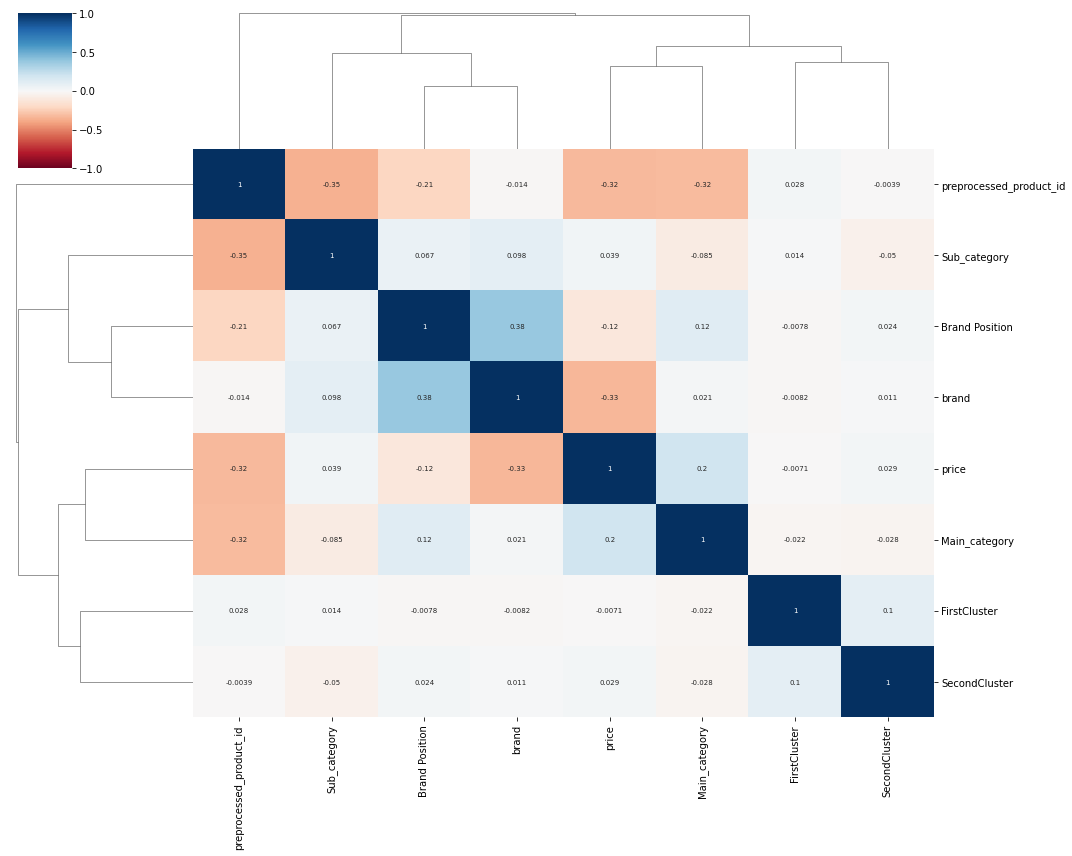

In [622]:
sns.clustermap(correlations, method="complete", cmap='RdBu', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));

Estimated number of clusters: 178
Estimated number of noise points: 1354
Homogeneity: 0.415
Completeness: 0.499
V-measure: 0.453
Adjusted Rand Index: -0.067
Adjusted Mutual Information: 0.232
Silhouette Coefficient: 0.059


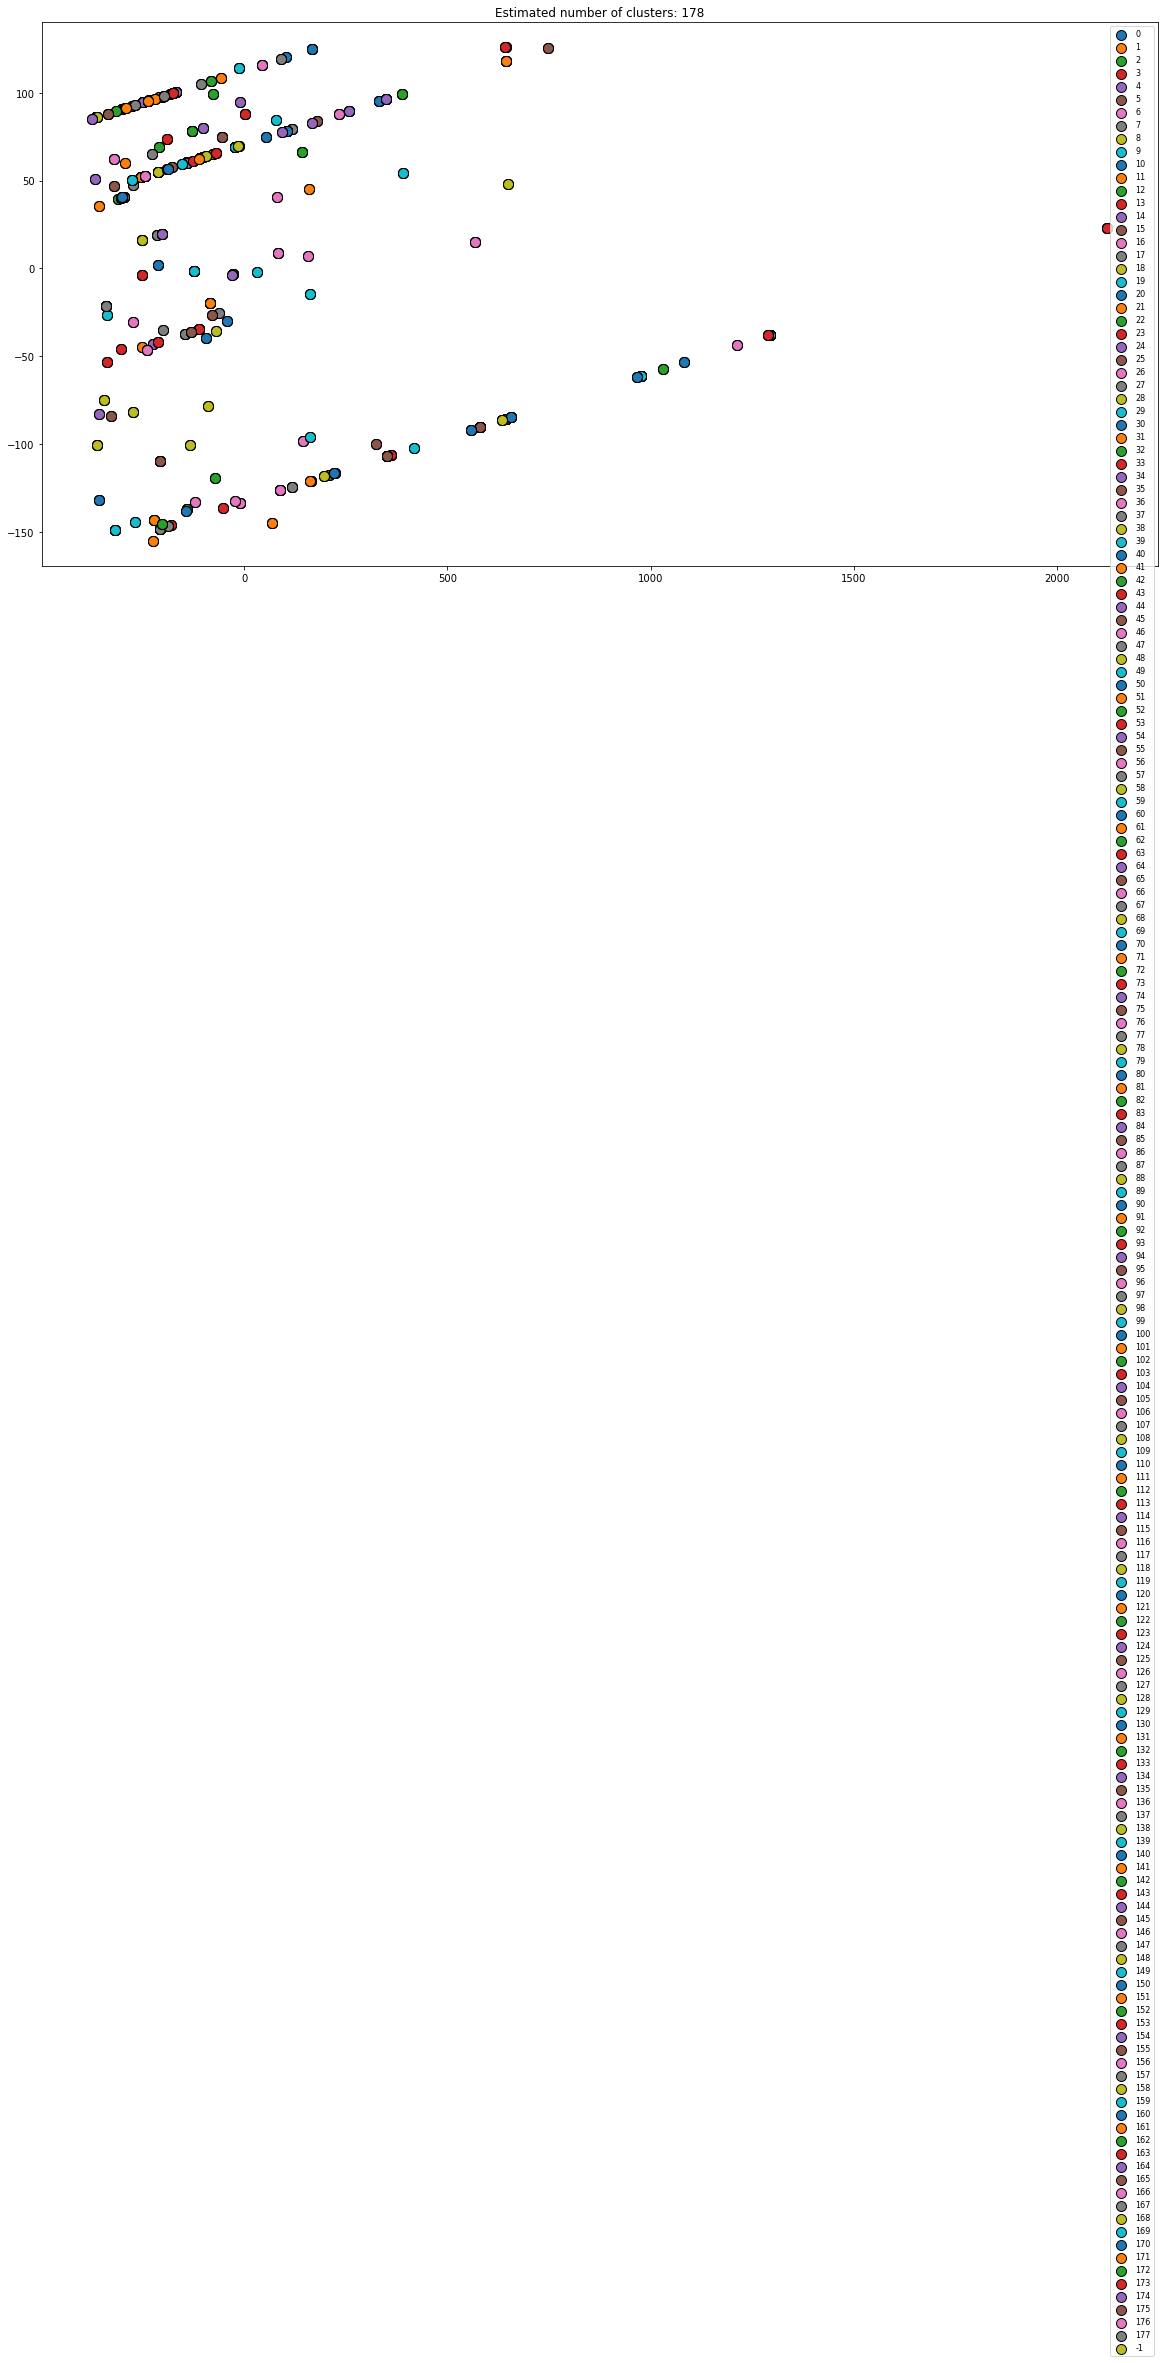

In [250]:
# kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

db = DBSCAN(eps=0.1, min_samples=4).fit(X)  # 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
# print(unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(20, 10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0] , xy[:,1] , label = k, s=100, edgecolor ='black')
#     plt.plot(
#         xy['product_id'],
#         xy['price'],
#         "o",
#         markerfacecolor=tuple(col),
#         markeredgecolor="k",
#         markersize=20,
#     )

#     xy = X[class_member_mask & ~core_samples_mask]  # 아웃라이어~
#     plt.plot(
#         xy['product_id'],
#         xy['price'],
#         "o",
#         markerfacecolor=tuple(col),
#         markeredgecolor="k",
#         markersize=6,
#     )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.legend(loc='best',fontsize=8)
plt.show()

### 전처리 및 EDA

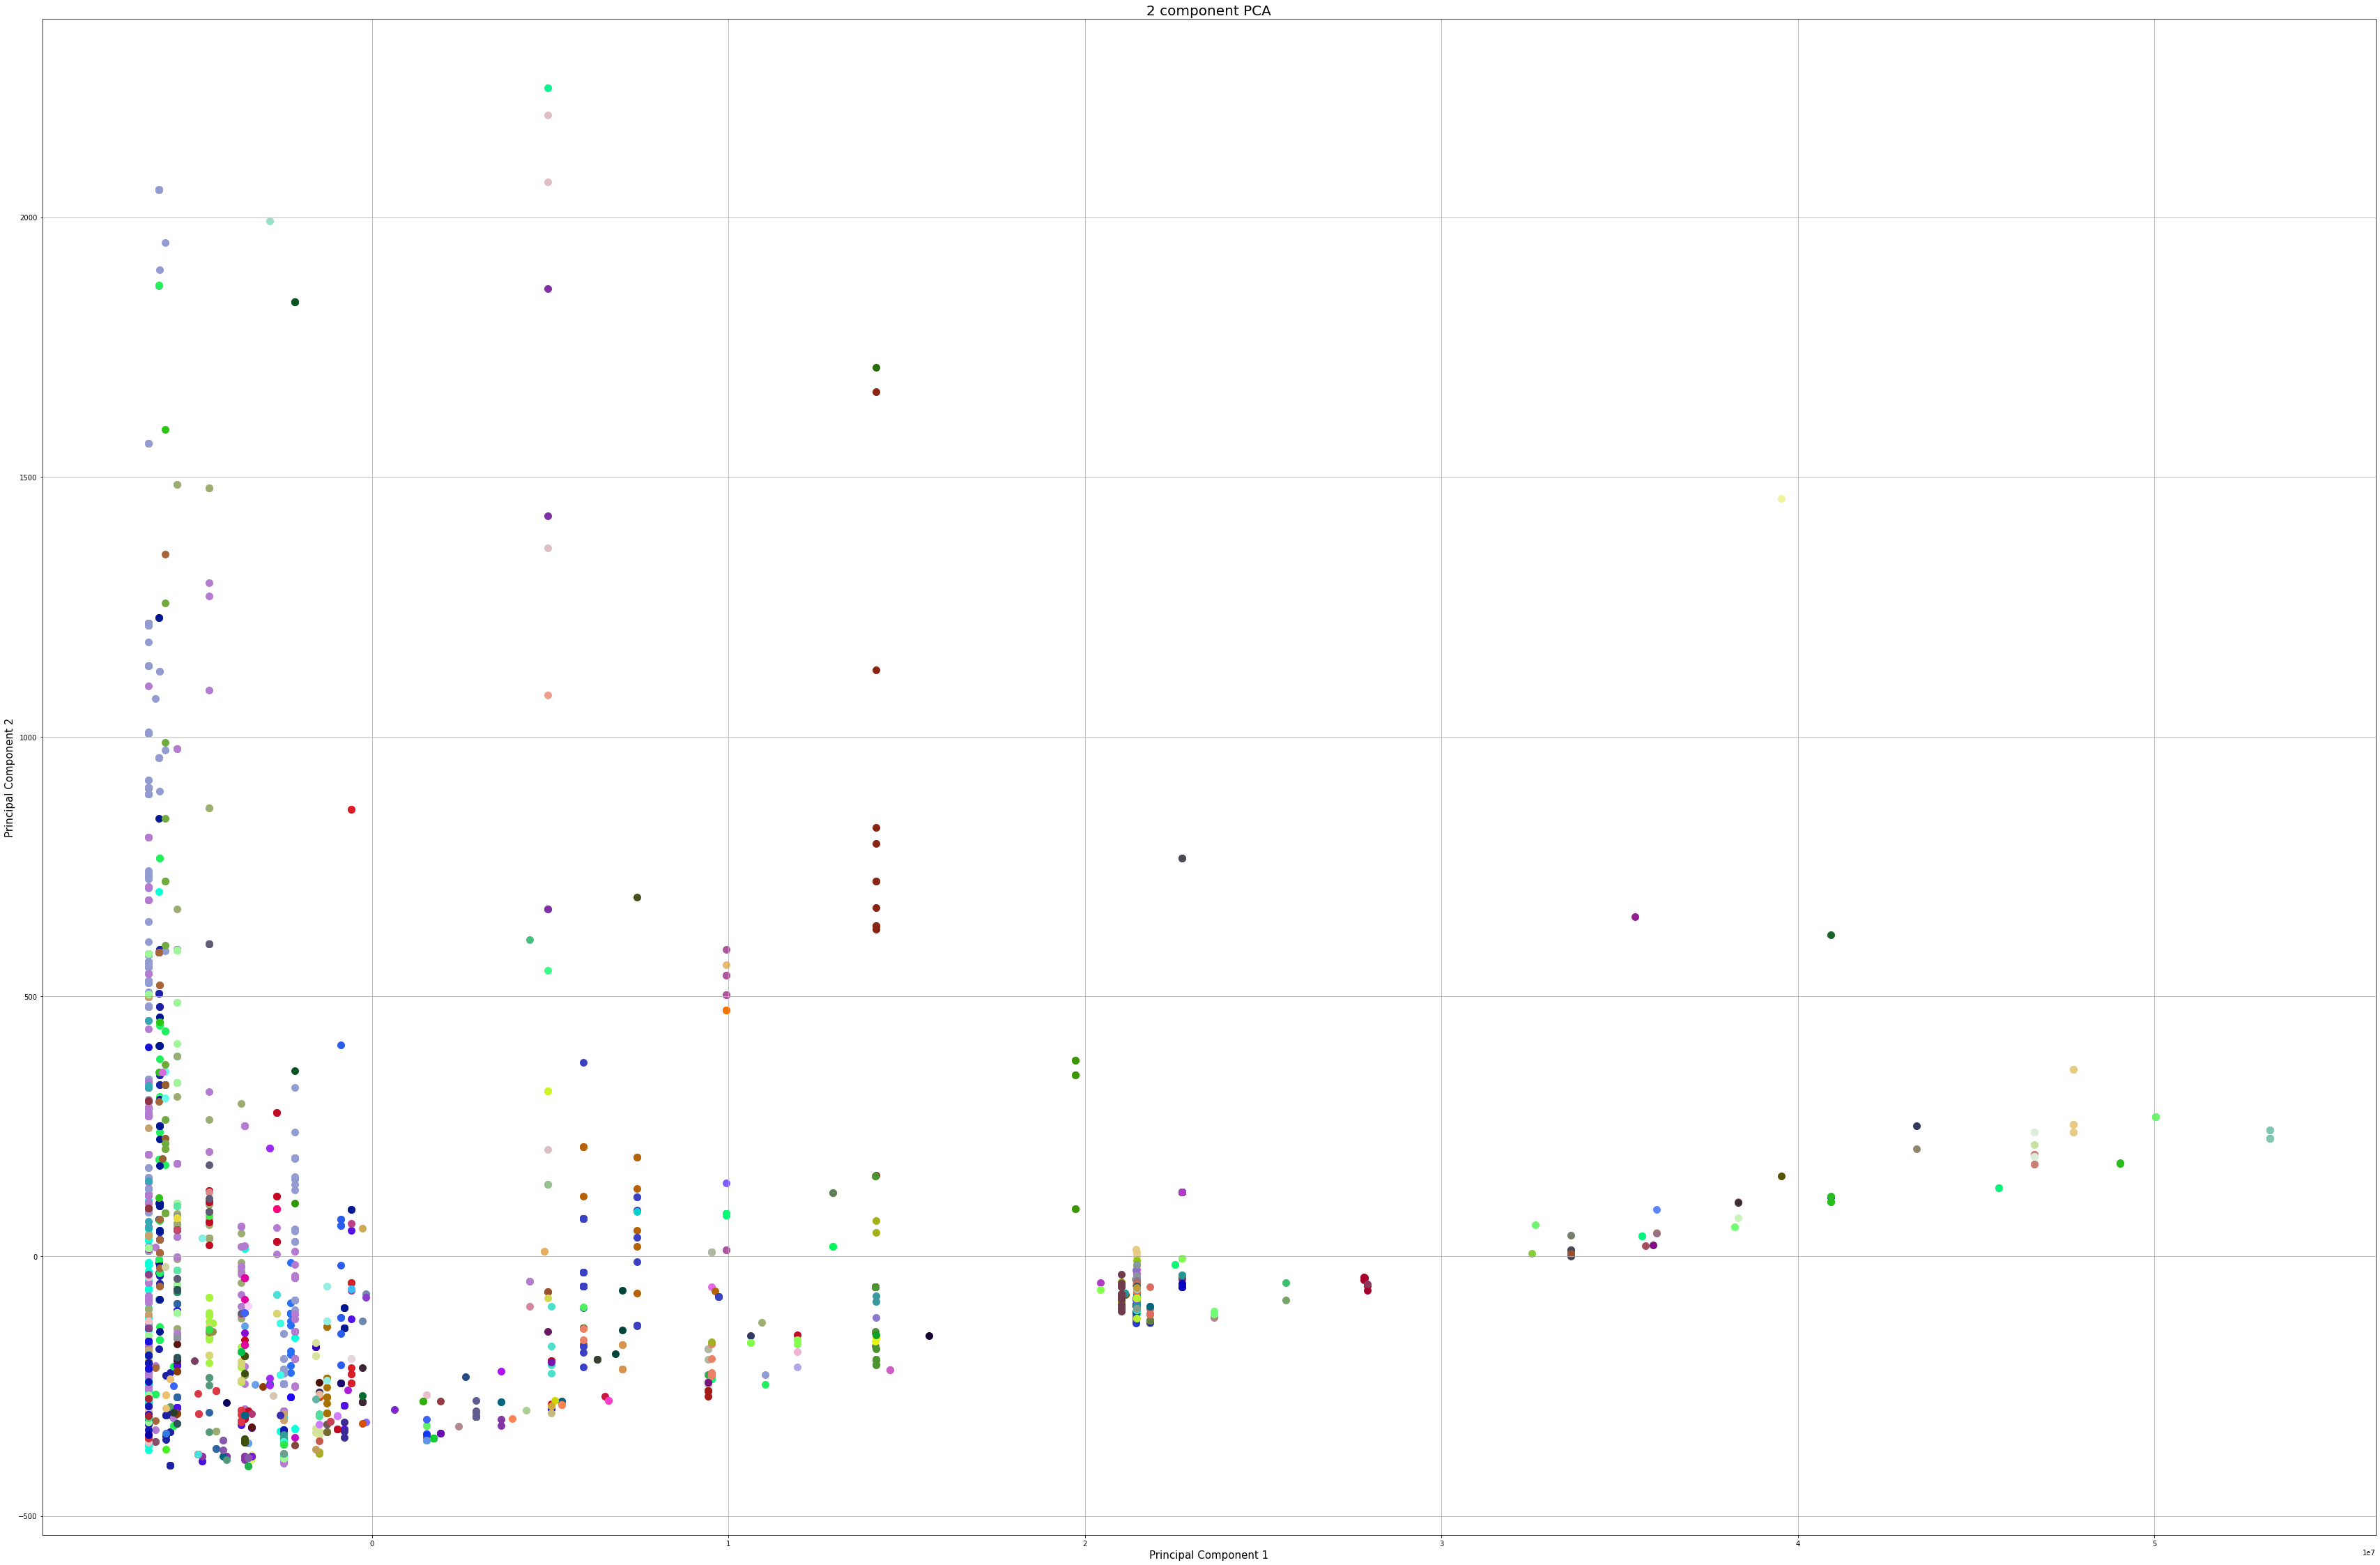

In [162]:
### PCA (with 실제 레이블)
Remove_null_Nov_copy = Nov_copy.dropna(how='any',axis=0)
data = Remove_null_Nov_copy[['product_id','price','brand']]
# data = Remove_null_Nov_copy[['product_id','price','weekday','event_type_cat','brand']]
X = data[['product_id','price']]
pca = PCA(2)
X = pca.fit_transform(X)

Y = data['brand']
principalDf = pd.DataFrame(data = X
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Y], axis = 1)

fig = plt.figure(figsize=(60, 40))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = pd.unique(finalDf['brand'])
number_of_colors = len(targets)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['brand'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 100)
# ax.legend(targets)
ax.grid()

### 엘보우 기법을 통한 최적의 K 찾아내기

In [172]:
## PCA (with K-means 군집 레이블) - 결측치를 그냥 제거 했을 떄 
Remove_null_Nov_copy = Nov_copy.dropna(how='any',axis=0)
pca = PCA(2)
X = Remove_null_Nov_copy[['product_id','price','weekday','event_type_cat']]
X = pca.fit_transform(X)
brand_type = Nov_copy.brand.unique()
# print(brand_type, len(brand_type))


distortions = []
for k in range(1,len(brand_type)):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    distortions.append(kmeans.inertia_)

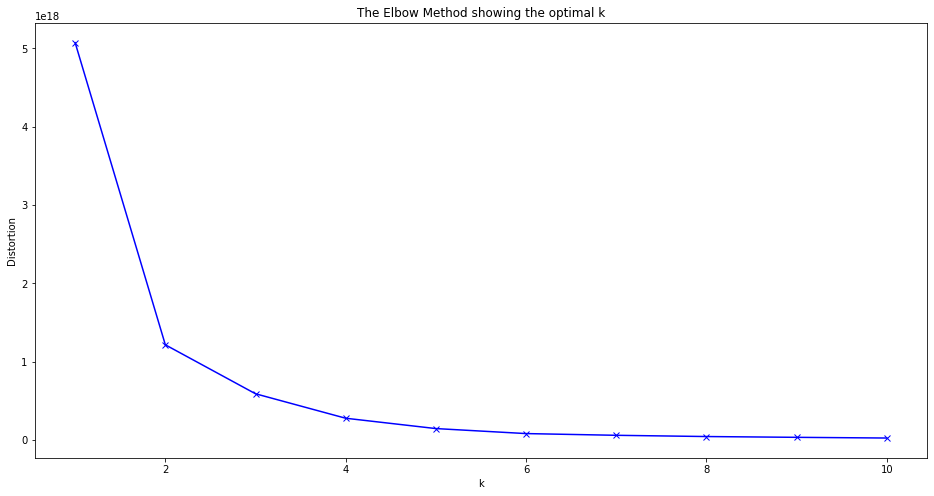

In [173]:
### 최적의 클러스터 갯수 구하기 
K = range(1,len(brand_type))
plt.figure(figsize=(16,8))
plt.plot(K[:10], distortions[:10], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

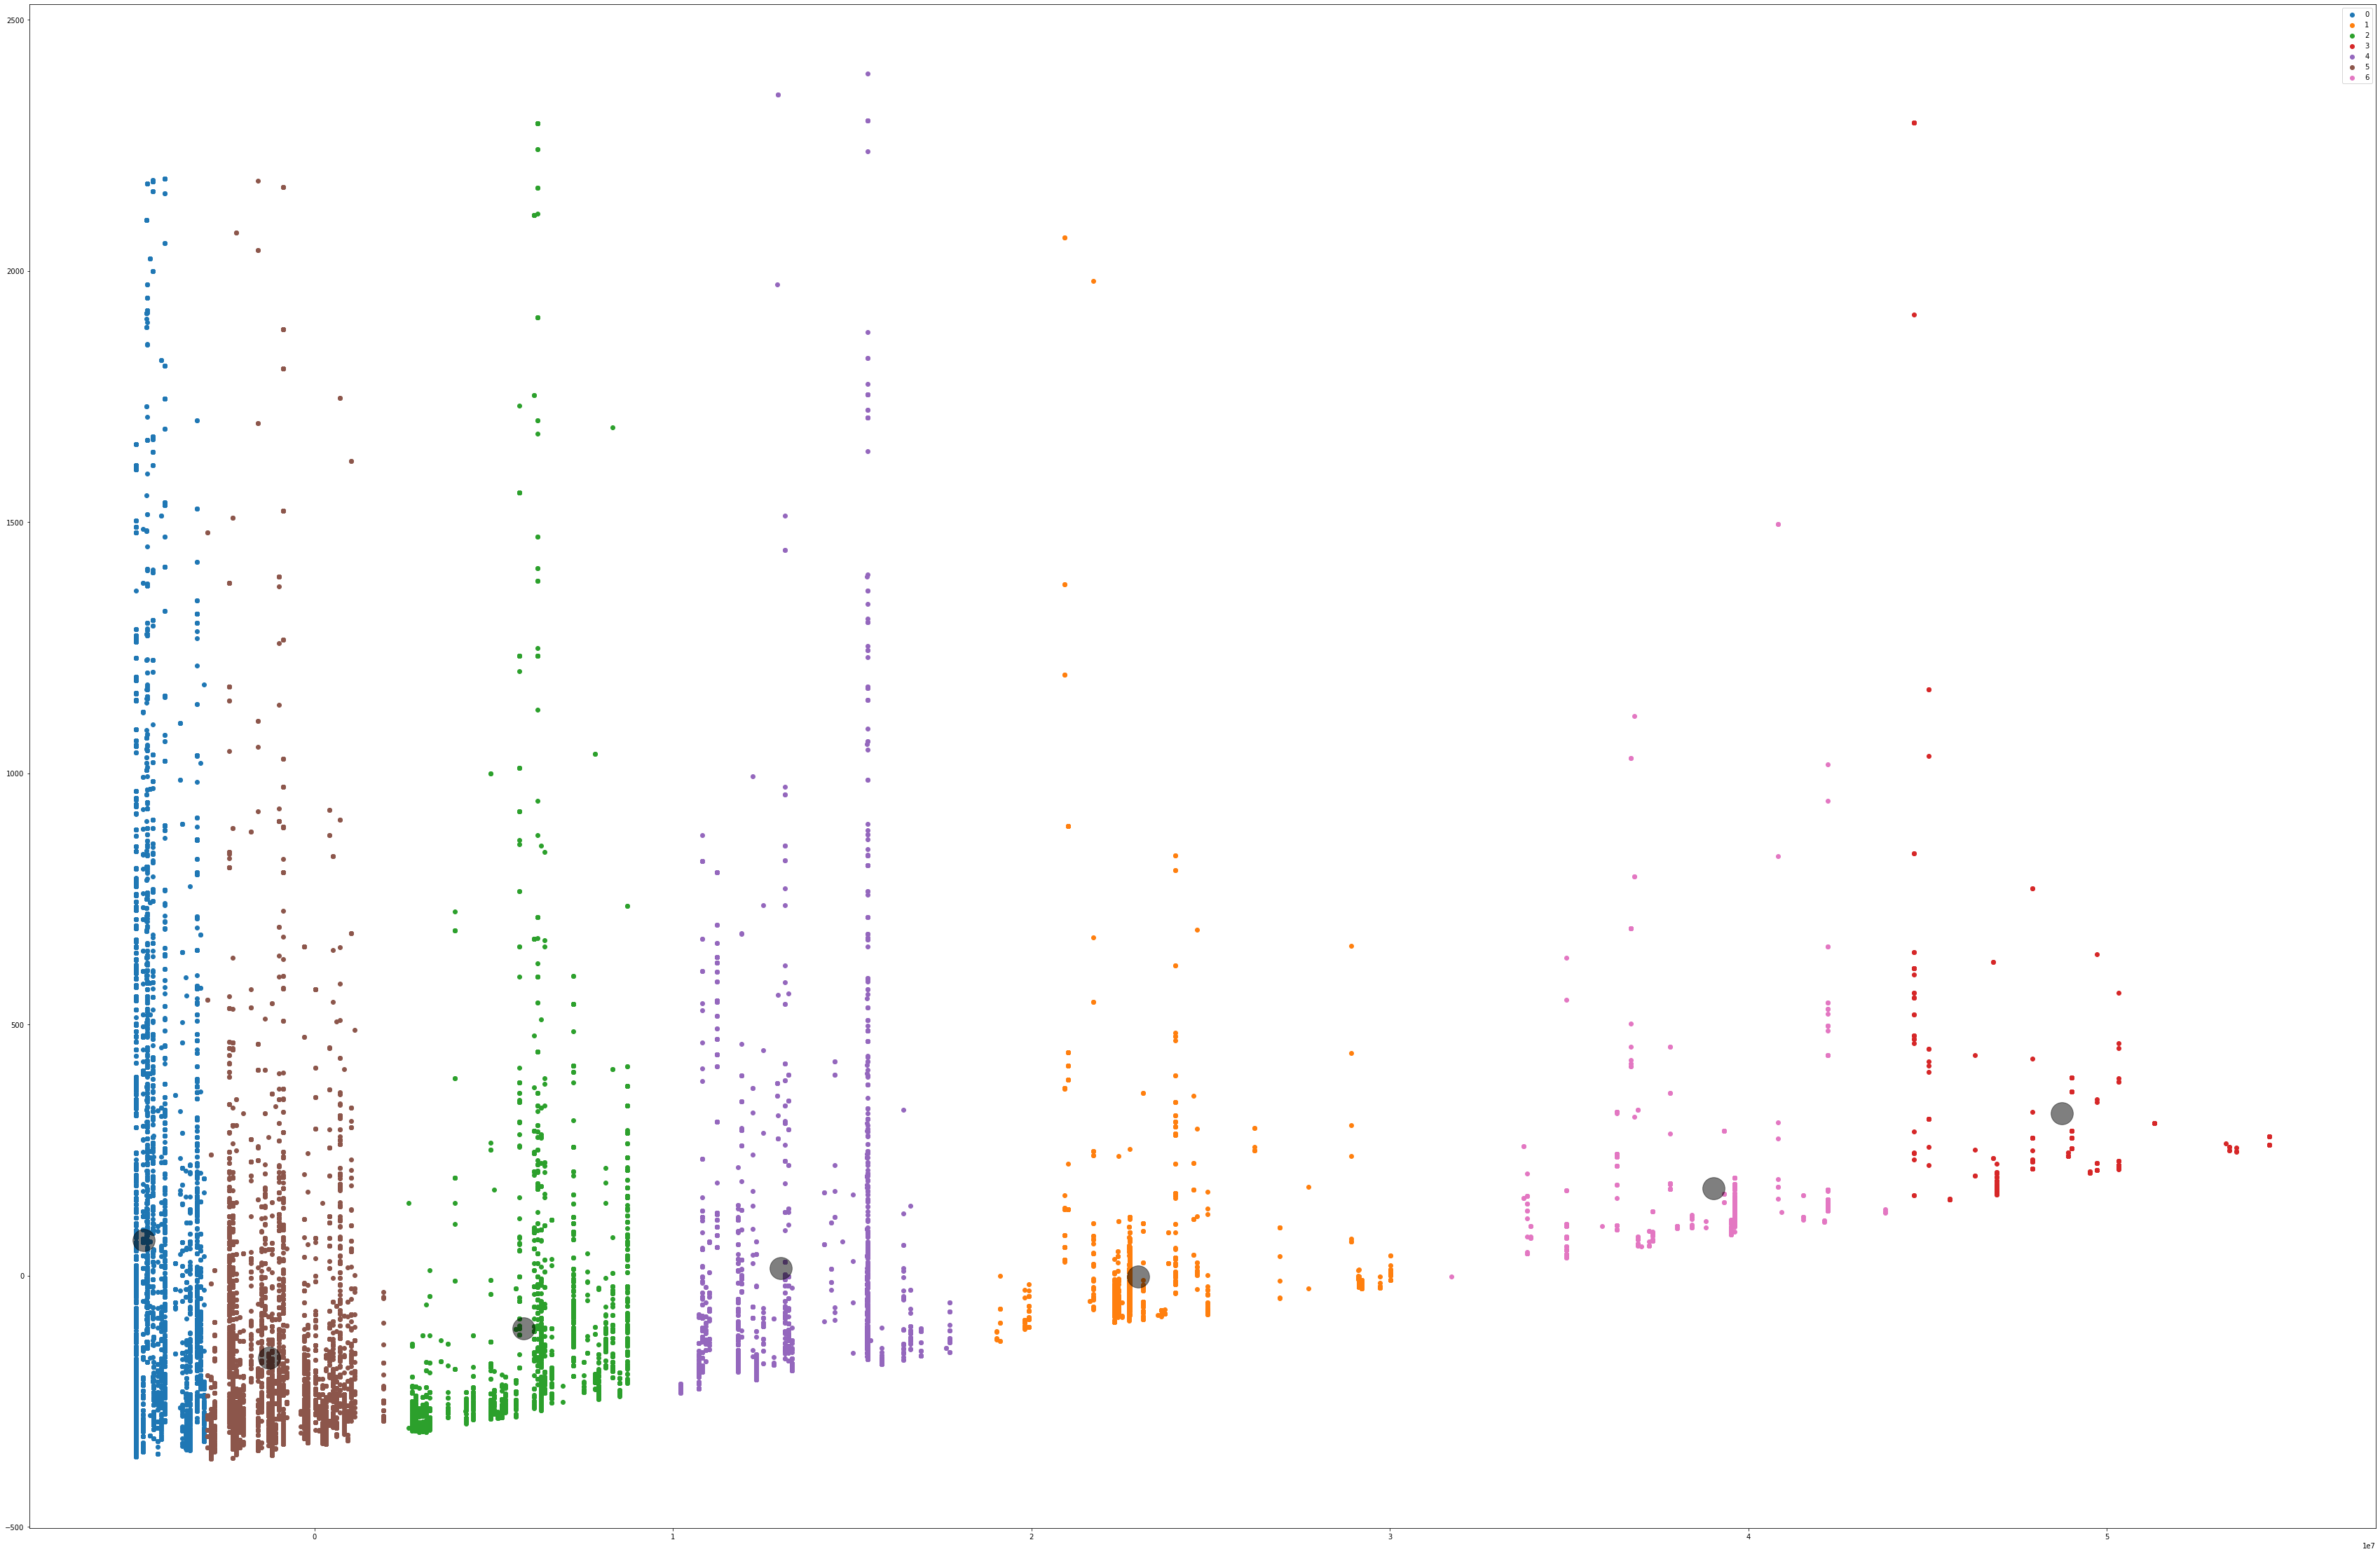

In [174]:
## K-means 결과 시각화
Remove_null_Nov_copy = Nov_copy.dropna(how='any',axis=0)
pca = PCA(2)
X = Remove_null_Nov_copy[['product_id','price','weekday','event_type_cat']]
# X = data[['product_id','price']]
X = pca.fit_transform(X)
brand_type = Nov_copy.brand.unique()

kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
u_labels = np.unique(y_kmeans)
centers = kmeans.cluster_centers_

plt.figure(figsize=(60, 40))
for i in u_labels:
    plt.scatter(X[y_kmeans == i , 0] , X[y_kmeans == i , 1] , label = i)
plt.legend()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=1000, alpha=0.5);
plt.show()


### 군집평가

In [175]:
### 실루엣 분석 --> 각 군집 간의 거리가 얼마나 효율적으로 분리 돼있는지 나타내는 지표 (내부 지표)
# 1로 가까워 질수록 근처의 군집과 더 멀리 떨어져있음.
# 0에 가까울 수록 더 가까워짐
# -의 경우 아예 다른 군집에 데이터 포인트가 할당됐음
from sklearn.metrics import silhouette_samples, silhouette_score
data['silhouette_coeff'] = silhouette_samples(X, y_kmeans)

print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(X, y_kmeans)
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

silhouette_samples( ) return 값의 shape (5526,)
붓꽃 데이터셋 Silhouette Analysis Score:0.786


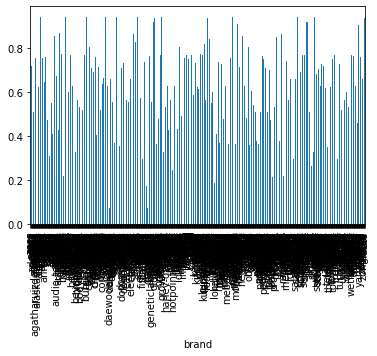

In [176]:
(data.groupby('brand')['silhouette_coeff'].mean()).plot.bar()

59443


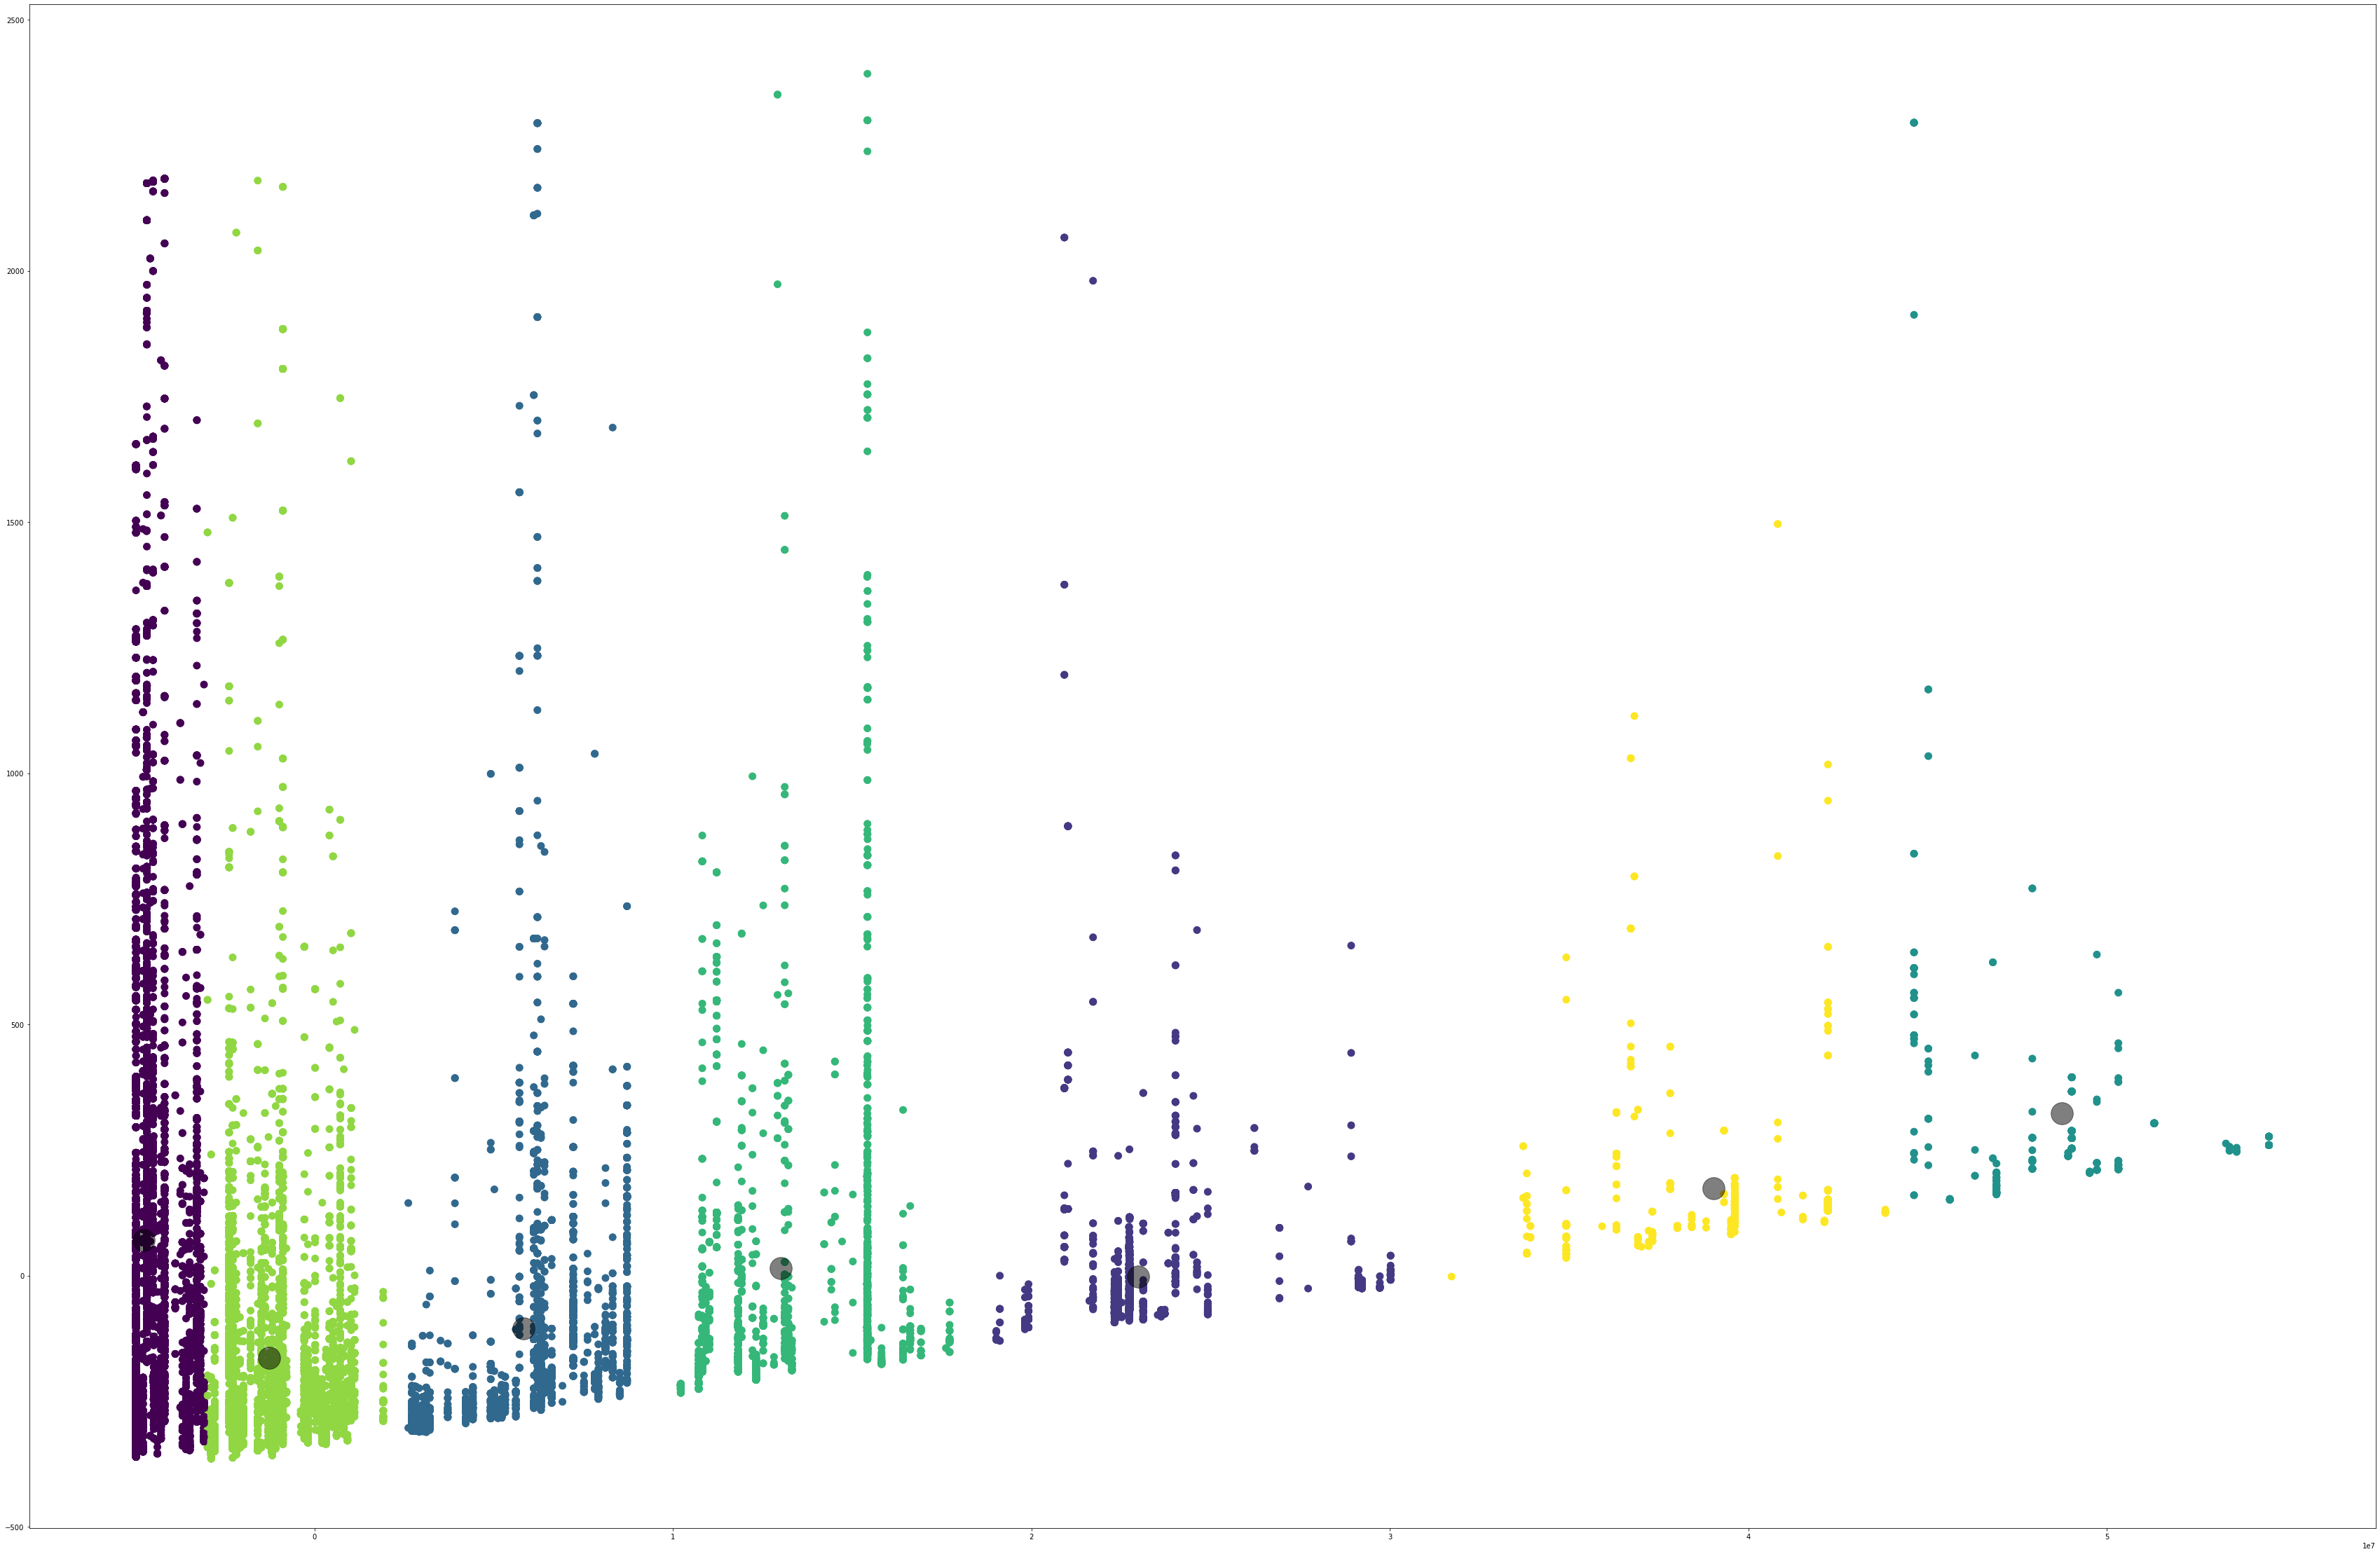

In [177]:
#P CA (with K-means 군집 레이블) - 결측치를 제거하지 않고 전부 이용
# category_id를 추가 시 군집을 못찾게 된다.
data = Nov_copy[['product_id','price','weekday','event_type_cat','brand']]

pca = PCA(2)
X = data[['product_id','price','weekday','event_type_cat']]
X = pca.fit_transform(X)
brand_type = data.brand.unique()
# print(brand_type, len(brand_type))
# Y = data['brand']

plt.figure(figsize=(60, 40))

# len(brand_type)
kmeans = KMeans(n_clusters=7, init="k-means++", n_init=10, random_state=0).fit(X)
y_kmeans = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
print(len(y_kmeans))
# print(y_kmeans)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=1000, alpha=0.5);

plt.show()

In [178]:
data['silhouette_coeff'] = silhouette_samples(X, y_kmeans)

print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(X, y_kmeans)
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))
data.groupby('brand')['silhouette_coeff'].mean()

<ipython-input-178-d5bb34f6ffec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['silhouette_coeff'] = silhouette_samples(X, y_kmeans)


silhouette_samples( ) return 값의 shape (5526,)
붓꽃 데이터셋 Silhouette Analysis Score:0.786


brand
acer        0.877286
aces        0.711244
acme        0.713853
acv         0.717733
adam        0.764286
              ...   
zinc        0.770374
zlatek      0.551015
zongshen    0.708571
zte         0.939970
zubr        0.603246
Name: silhouette_coeff, Length: 860, dtype: float64

- 샘플의 크기를 늘려서 진행해보기
- 파생변수를 추가했을 때의 변화

### DBSCAN 적용

In [124]:
Remove_null_Nov_copy[['weekday','price','day/night','Main_category', 'Sub_category', 'event_type_cat']].values

array([[  4.  , 489.07,   0.  ,   6.  ,  34.  ,   0.  ],
       [  4.  , 293.65,   0.  ,   2.  ,  31.  ,   0.  ],
       [  4.  , 712.87,   0.  ,   2.  ,  47.  ,   0.  ],
       ...,
       [  4.  , 717.63,   0.  ,   6.  ,  34.  ,   0.  ],
       [  4.  , 132.1 ,   0.  ,   6.  ,  26.  ,   0.  ],
       [  4.  , 239.13,   0.  ,   6.  ,  42.  ,   0.  ]])

Estimated number of clusters: 104
Estimated number of noise points: 1524
Homogeneity: 0.326
Completeness: 0.468
V-measure: 0.384
Adjusted Rand Index: -0.066
Adjusted Mutual Information: 0.190
Silhouette Coefficient: -0.070


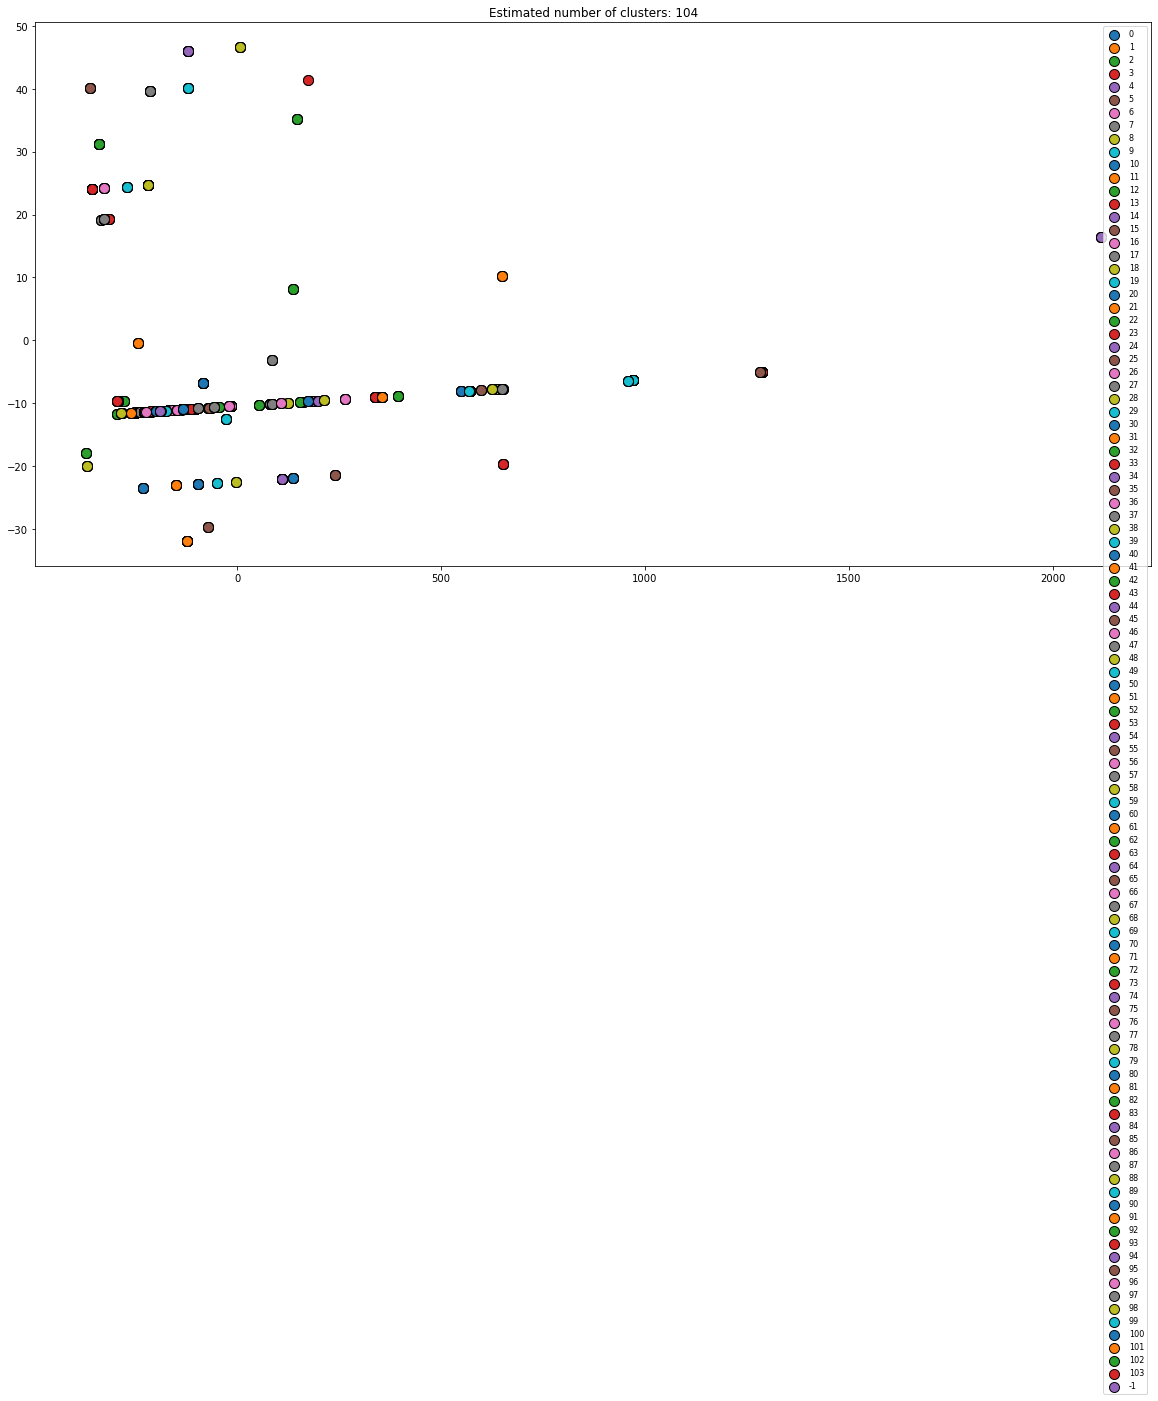

In [163]:
## DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
# kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
labels_true = Remove_null_Nov_copy['brand']
X = Remove_null_Nov_copy[['weekday','price','day/night','Main_category', 'Sub_category', 'event_type_cat']].values
pca = PCA(2)
X = pca.fit_transform(X)
db = DBSCAN(eps=0.7, min_samples=6).fit(X)  # 

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
# print(unique_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(20, 10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0] , xy[:,1] , label = k, s=100, edgecolor ='black')
#     plt.plot(
#         xy['product_id'],
#         xy['price'],
#         "o",
#         markerfacecolor=tuple(col),
#         markeredgecolor="k",
#         markersize=20,
#     )

#     xy = X[class_member_mask & ~core_samples_mask]  # 아웃라이어~
#     plt.plot(
#         xy['product_id'],
#         xy['price'],
#         "o",
#         markerfacecolor=tuple(col),
#         markeredgecolor="k",
#         markersize=6,
#     )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.legend(loc='best',fontsize=8)
plt.show()

In [180]:
### DBSCAN 평가 하기

### 게층적 군집방법 - 덴드로그램

In [181]:
Nov_copy

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Main_category,Sub_category,weekday,event_type_cat
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,electronics,'smartphone',4,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,appliances,'sewing_machine',4,0
2,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,appliances,"'kitchen', 'washer'",4,0
3,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,electronics,'smartphone',4,0
4,2019-11-01 00:00:01+00:00,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c,computers,'notebook',4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59438,2019-11-01 03:52:45+00:00,view,1004781,2053013555631882655,electronics.smartphone,huawei,254.71,514148475,03f3fa00-1c0a-48e3-9cd1-f9ae4b11809e,,,4,0
59439,2019-11-01 03:52:45+00:00,view,1005159,2053013555631882655,electronics.smartphone,xiaomi,212.10,566309730,72b2106a-c885-41d5-99ab-bbed9fa730f7,,,4,0
59440,2019-11-01 03:52:45+00:00,cart,1801906,2053013554415534427,electronics.video.tv,tcl,257.33,564331418,092b3c00-2d01-40e7-a1d9-dfa9bbad847e,,,4,1
59441,2019-11-01 03:52:45+00:00,view,3100954,2053013555262783879,appliances.kitchen.blender,scarlett,47.59,536691296,e8c0cad6-58a7-46e9-8fcd-3ff49f37fb46,,,4,0


In [182]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = Nov_copy[['product_id','price','weekday','event_type_cat','brand']]
data['brand'] = le.fit_transform(data['brand'])


<ipython-input-182-8f355f728f2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['brand'] = le.fit_transform(data['brand'])


In [183]:
# 계층적 군집 model
from scipy.cluster.hierarchy import linkage, dendrogram
pca = PCA(2)
X = data[['product_id','price','weekday','event_type_cat']]
X = pd.DataFrame(pca.fit_transform(X), columns=['First','Second'])
Y = data['brand']
DF = pd.concat([X,Y],axis=1)

clusters = linkage(y=DF, method='complete', metric='euclidean')
clusters
clusters.shape # (5525, 4)

(59442, 4)

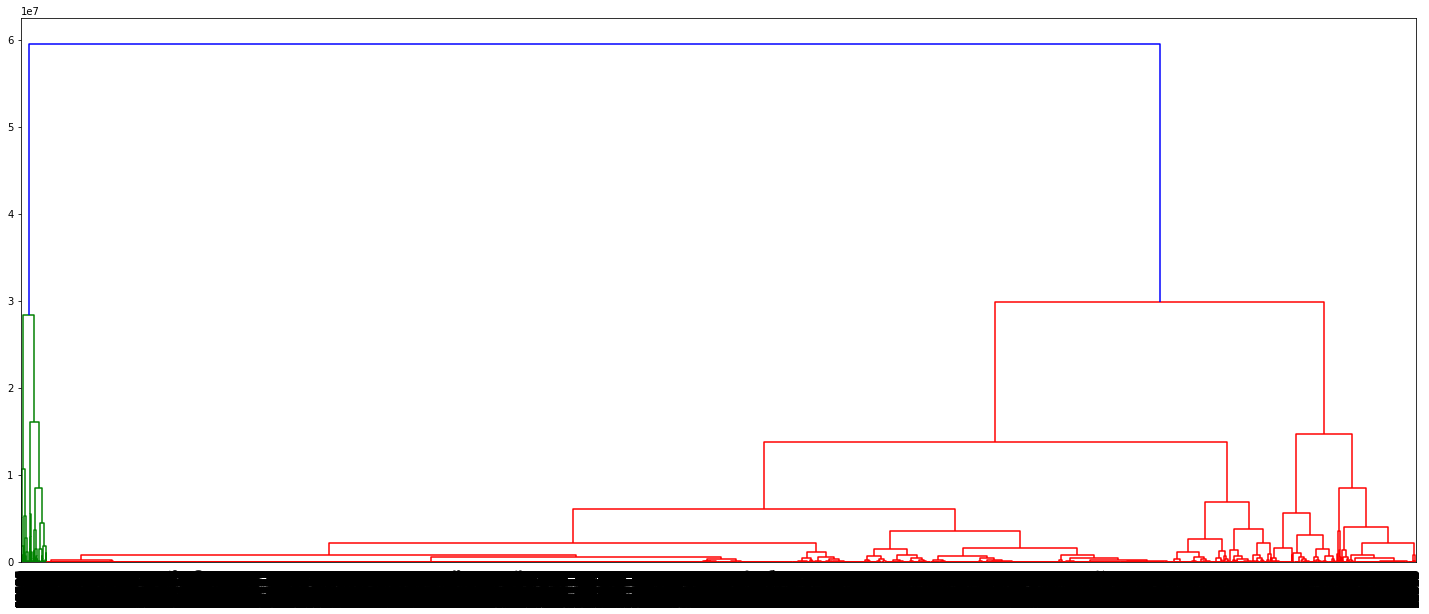

In [184]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
# leaf_rotation=90 : 글자 각도
# leaf_font_size=20 : 글자 사이즈
plt.show() 

In [185]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

cut_tree = fcluster(clusters, t=3, criterion='distance')
cut_tree # prediction

labels = DF['brand'] # 정답

df = pd.DataFrame({'pred':cut_tree, 'labels':labels})

con_mat = pd.crosstab(df['pred'], df['labels'])
con_mat

labels,0,1,2,3,4,5,6,7,8,9,...,850,851,852,853,854,855,856,857,858,859
pred,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
DF.head()
DF['cluster'] = cut_tree
DF.head()

,First,Second,brand,cluster
0,-4.976404e+06,90.120913,843,849
1,-9.797770e+05,-62.737568,403,3681
2,-2.378335e+06,341.588685,462,4773
3,-4.975090e+06,-215.665093,843,1286
4,-4.672971e+06,-35.627719,369,1953


In [191]:
len(DF['cluster'].unique())

8378

No handles with labels found to put in legend.


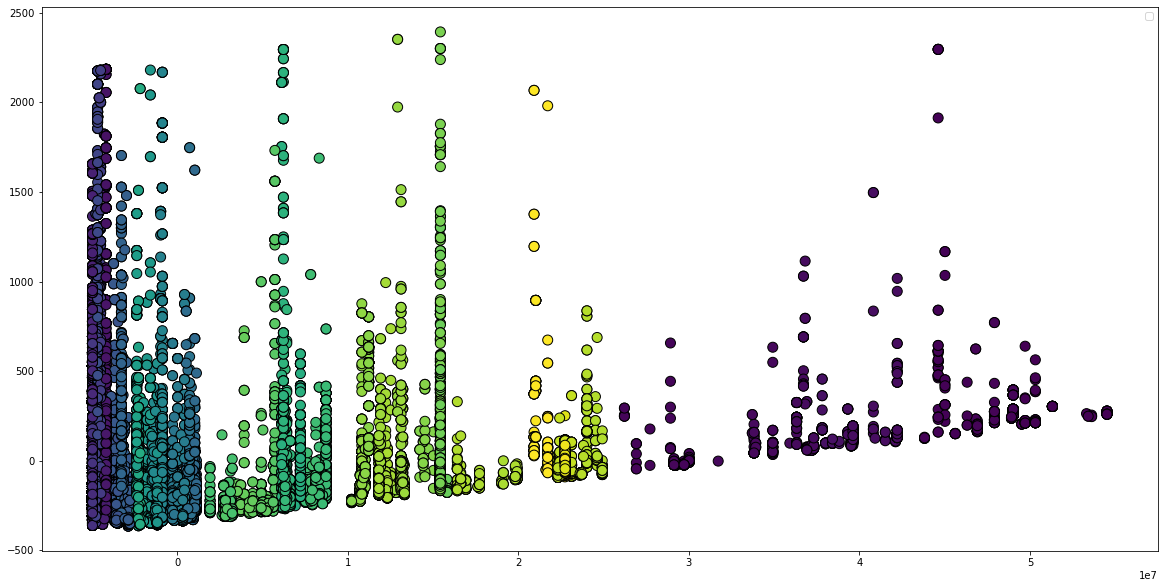

In [187]:
plt.figure(figsize=(20, 10))

plt.scatter(x=DF['First'], y=DF['Second'], c=DF['cluster'], s=100, edgecolor ='black')
plt.legend()

In [188]:
print(DF['cluster'].value_counts())

1302    1231
1308    1152
1014     906
1036     863
1297     653
        ... 
5418       1
3369       1
7253       1
7435       1
1388       1
Name: cluster, Length: 8378, dtype: int64


### 이상치 처리하기

50001
[   27    50    54 ... 49960 49975 49988]
[]
[   40   107   168 ... 49957 49981 49990]
[   30    35    52 ... 49928 49951 49978]


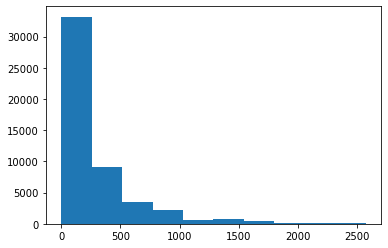

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,weekday,event_type_cat,prics_scale
27,2019-11-01 00:00:10+00:00,view,1005115,2053013555631882655,electronics.smartphone,apple,949.47,562079864,0fe64462-83eb-4131-ab00-8e764dd995c3,4,0,1.868576
50,2019-11-01 00:00:17+00:00,view,21406939,2053013561579406073,electronics.clocks,tissot,895.78,513118352,4c14bf2a-2820-4504-929d-046356a5a204,4,0,1.716995
54,2019-11-01 00:00:18+00:00,view,1003317,2053013555631882655,electronics.smartphone,apple,928.18,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0,4,0,1.808469
79,2019-11-01 00:00:27+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1091.33,565404816,d9cf0ac4-c3ec-4e1f-83aa-326b1e7b1581,4,0,2.269084
87,2019-11-01 00:00:29+00:00,view,1307338,2053013558920217191,computers.notebook,asus,849.42,530857208,c69f9c63-7098-426c-97d9-8cb94a0a1083,4,0,1.586109
...,...,...,...,...,...,...,...,...,...,...,...,...
49915,2019-11-01 02:48:19+00:00,purchase,1005115,2053013555631882655,electronics.smartphone,apple,949.47,546076557,0be174cd-1c9e-4bc1-be41-1fbb27e2e224,4,2,1.868576
49941,2019-11-01 02:48:22+00:00,view,1005115,2053013555631882655,electronics.smartphone,apple,949.47,514440868,e2281bae-dd54-42ae-bfa9-c5c3a5aa023b,4,0,1.868576
49960,2019-11-01 02:48:24+00:00,view,3000137,2053013555120177537,appliances.kitchen.steam_cooker,smeg,1857.18,512436898,5e21842a-ebc0-4504-8551-5bd16227b69f,4,0,4.431277
49975,2019-11-01 02:48:25+00:00,view,1005073,2053013555631882655,electronics.smartphone,samsung,1133.36,566300343,0b919ca2-df3a-44fe-b332-89bde229d57a,4,0,2.387745


In [81]:
### 내부적인 회의를 통해 조건 설정 
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

# 조건을 만족하지 않은 인덱스 출력
print(len(Nov_copy))
print(outliers_iqr(Nov_copy['price'])[0])   ## price의 경우 4040개의 아웃라이어 포함
print(outliers_iqr(Nov_copy['weekday'])[0])  
print(outliers_iqr(Nov_copy['event_type_cat'])[0])
print(outliers_iqr(Nov_copy['product_id'])[0]) 

## price 이상치 확인하기 : 실제분포를 기반으로 이상치 분류의 원인 찾기
n, bins, patches = plt.hist(Nov_copy['price'], bins=10)
plt.show()
Nov_copy.iloc[outliers_iqr(Nov_copy['price'])[0]]

In [48]:
# 데이터 단위 변환 --> 정규화

# price 변수에 대해 적용
# preprocessing.scale(np.log(Nov_copy['price']+1)) # 로그
Nov_copy['prics_scale'] = preprocessing.scale(Nov_copy['price']) # Scalling 0~1로 변환